# EDA of the dataset

In [1]:
## In this Notebook we will explore the opensource dataset I found
## We will use tensorflow because the dataset is prebuild there

# Loading the Dataset

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the MovieLens 100K dataset
ratings_dataset = tfds.load('movielens/latest-small-ratings', split='train')
movies_dataset = tfds.load('movielens/latest-small-movies', split='train')

/Users/anastasiiadorval/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/anastasiiadorval/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
# Lets see what is in this dataset

print('Ratings Dataset', list(next(iter(ratings_dataset)).keys()))
print('Movies Dataset', list(next(iter(movies_dataset)).keys()))


Ratings Dataset ['movie_genres', 'movie_id', 'movie_title', 'timestamp', 'user_id', 'user_rating']
Movies Dataset ['movie_genres', 'movie_id', 'movie_title']


2024-01-15 12:28:41.148446: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-01-15 12:28:41.172173: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Looks like data is duplicated. Lets drop movies dataset for now

# Ploting Helpful Features

In [3]:
df = tfds.as_dataframe(tfds.load('movielens/latest-small-ratings', split='train'))

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

User Behavior Analysis

In [52]:
average_rating = df['user_rating'].mean()
rating_distribution = df['user_rating'].value_counts()

print("Average Rating:", average_rating)
print("\nRating Distribution:\n", rating_distribution)

Average Rating: 3.5015569

Rating Distribution:
 user_rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64


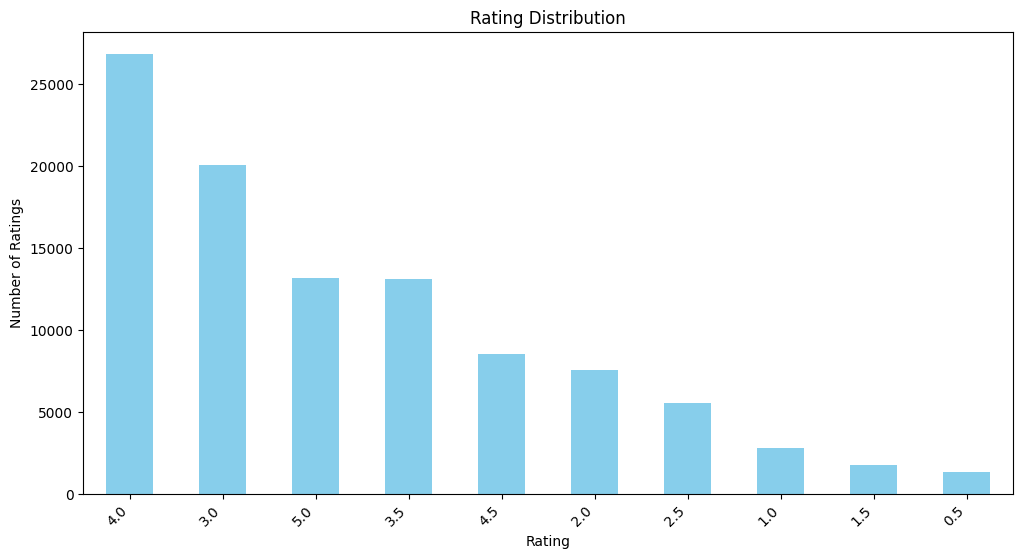

In [53]:
plt.figure(figsize=(12, 6))
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

Movie Popularity

In [58]:
movie_popularity = df.groupby('movie_id')['user_rating'].count()
most_popular_movies = movie_popularity.sort_values(ascending=False)

# Print the top N most popular movies
top_n = 10  # Change this value to print a different number of top movies
print(f"Top {top_n} Most Popular Movies:")
print(most_popular_movies.head(top_n))

Top 10 Most Popular Movies:
movie_id
b'356'     329
b'318'     317
b'296'     307
b'593'     279
b'2571'    278
b'260'     251
b'480'     238
b'110'     237
b'589'     224
b'527'     220
Name: user_rating, dtype: int64


Genre Analysis

In [59]:
# Flatten the 'movie_genres' column containing arrays
genres_flat = df['movie_genres'].explode()

# Count the occurrences of each genre
genre_distribution = Counter(genres_flat)

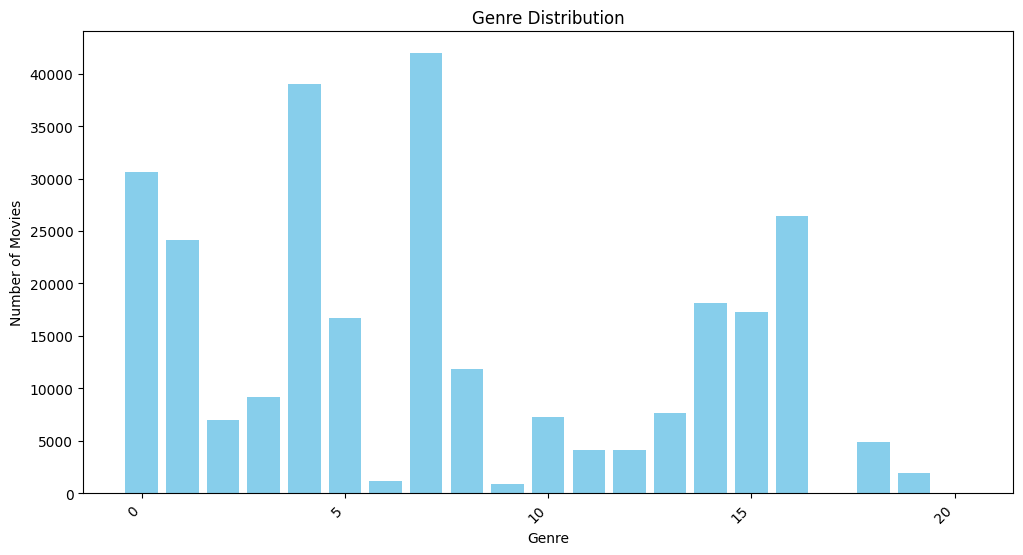

In [61]:
plt.figure(figsize=(12, 6))
plt.bar(genre_distribution.keys(), genre_distribution.values(), color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

Temporal Analysis

In [62]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
ratings_over_time = df.set_index('timestamp').resample('M').size()

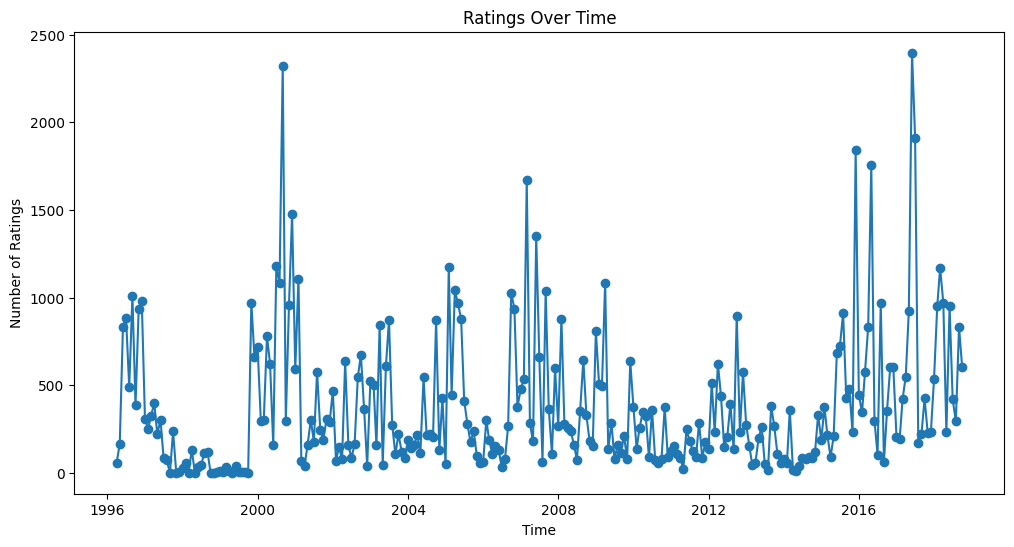

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(ratings_over_time.index, ratings_over_time.values, marker='o')
plt.title('Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()

User Engagement

In [65]:
user_ratings_count = df['user_id'].value_counts()

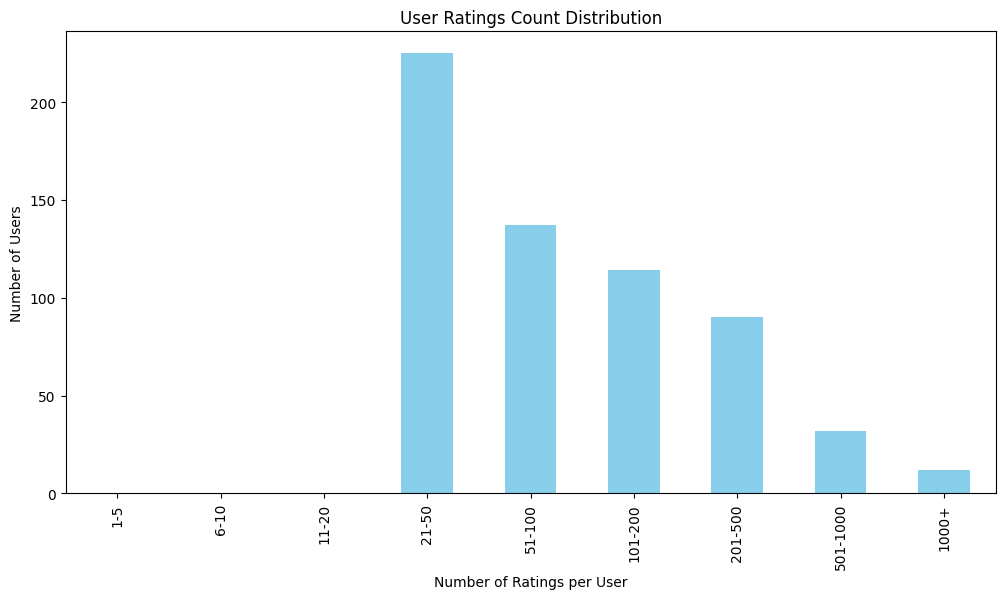

In [69]:
bins = [1, 5, 10, 20, 50, 100, 200, 500, 1000, float('inf')]
labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1000+']

# Group users into bins based on their rating counts
user_groups = pd.cut(user_ratings_count, bins=bins, labels=labels, right=False)

# Plotting user ratings count as a bar graph
plt.figure(figsize=(12, 6))
user_groups.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('User Ratings Count Distribution')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.show()

Movie Similarity

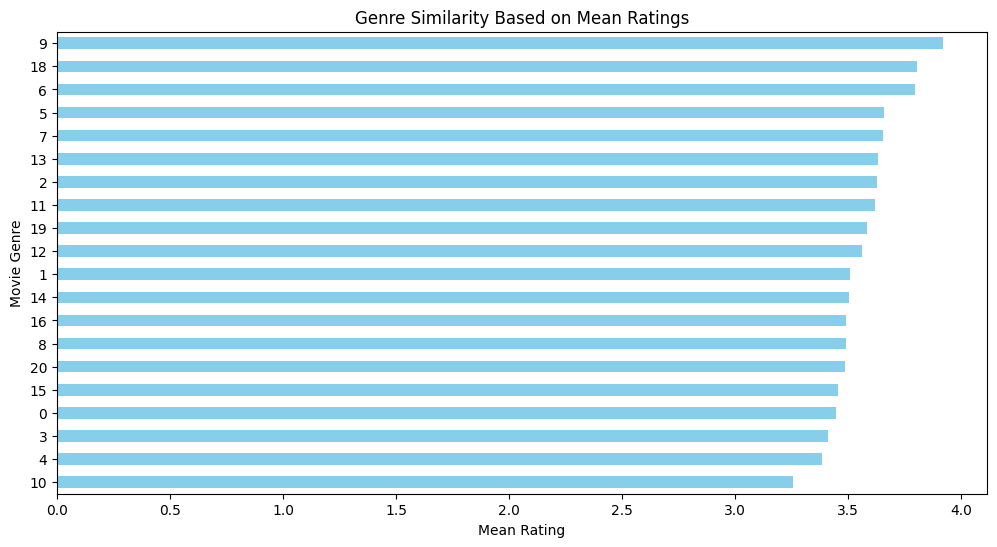

In [78]:
genres_flat = df['movie_genres'].explode()

# Create a new DataFrame with 'genres_flat' and 'user_rating'
genre_rating_df = pd.DataFrame({'genres': genres_flat, 'user_rating': df['user_rating']})

# Calculate genre similarity based on mean ratings
genre_similarity = genre_rating_df.groupby('genres')['user_rating'].mean()

# Plotting genre similarity
plt.figure(figsize=(12, 6))
genre_similarity.sort_values().plot(kind='barh', color='skyblue')
plt.title('Genre Similarity Based on Mean Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Movie Genre')
plt.show()

In [6]:
df['movie_genres'].apply(lambda x: x)

0               [7, 8, 13, 15]
1                      [7, 18]
2                       [5, 9]
3                 [10, 13, 16]
4         [1, 2, 3, 4, 12, 14]
                  ...         
100831                     [4]
100832                [13, 16]
100833                     [4]
100834             [4, 10, 12]
100835                 [8, 15]
Name: movie_genres, Length: 100836, dtype: object